<a href="https://colab.research.google.com/github/ArchanaDevrena/Analysis_Water_Potability/blob/main/Copy_of_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                     WATER POTABILITY ANALYSIS

The term "water potability" describes whether water is suitable and secure for human consumption.The project "Water Potability Analysis" aims to develop a prediction model that can evaluate the potability of a water sample based on several chemical attributes.The main objective of the study is to forecast if a particular water sample is appropriate for consumption.


##1. DATA PREPARATION

Importing Necessary Libraries

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score
from sklearn.svm import SVC, LinearSVC


Load the Dataset

In [ ]:
#Load the Dataset
df = pd.read_csv('water_potability.csv')
df.head(5)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


The water_potability.csv file contains water quality metrics for 3276 different water bodies and contains 3276 rows and  10 columns.
The attributes are:
1. pH value: PH is an important parameter in evaluating the acid–base balance of water.
2. Hardness: Hardness is mainly caused by calcium and magnesium salts.Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
3. Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc.
4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems.
5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks.
6. Conductivity: Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current.
7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources.
8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine.
9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state.
10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [ ]:
# rows, columns
df.shape

(3276, 10)

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Handling Missing Values

Checking for missing values

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df[df['ph'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.318980,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583850,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361960,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567410,10.333918,NaN,554.820087,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224230,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735260,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186770,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452650,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414930,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


In [ ]:
df[df['Sulfate'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.65668,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.00489,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.60079,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.74549,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692710,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601920,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268370,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841820,7.334648,NaN,442.545774,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862850,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539070,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481630,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979050,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


Here there are missing values present in both classess (Potability 1 & 0) of attributes ph,Sulfate,Trihalomethane,so it can replace with population mean. so, it will replace the Nan values bases on sample mean from both classes.

In [ ]:
############### Handling missing values in ph#############################################################
phMean_0 = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = phMean_0
phMean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = phMean_1

############### Handling missing values in sulfate #############################################################

SulfateMean_0 = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

############### Handling missing values in Trihalomethane #############################################################

TrihalomethanesMean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#2.EXPLORATORY DATA ANALYSIS

DATA VISUALIZATION

In [ ]:
color = sns.color_palette()


#### Frequency Distribution Chart

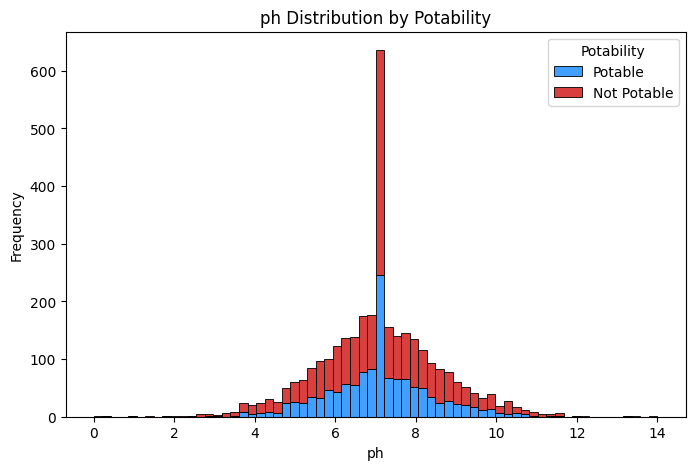

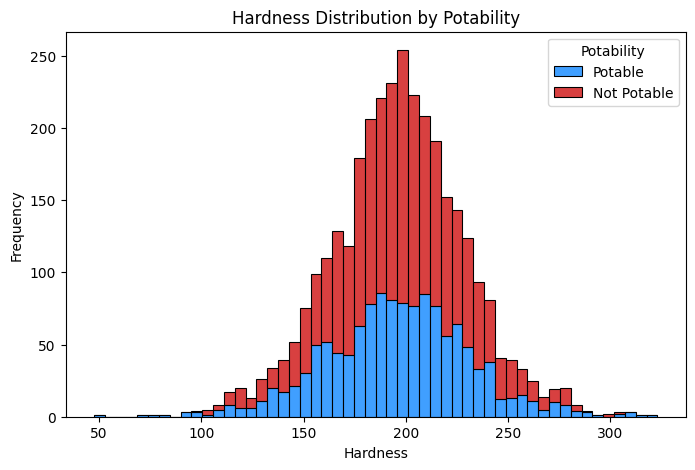

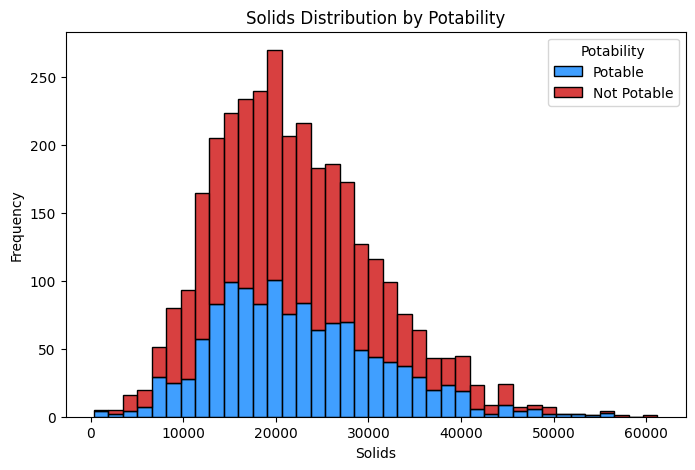

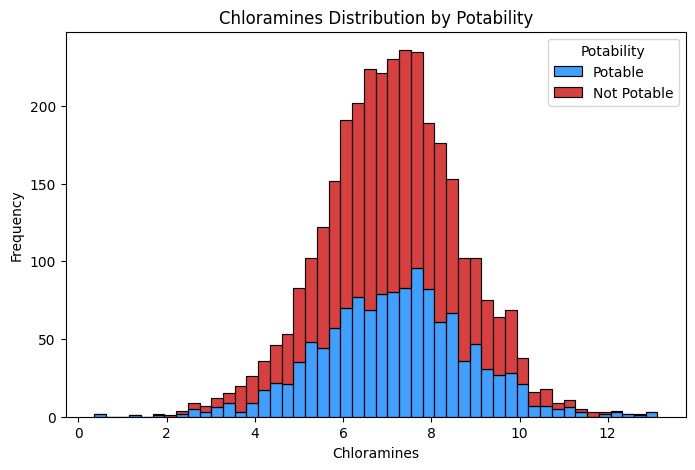

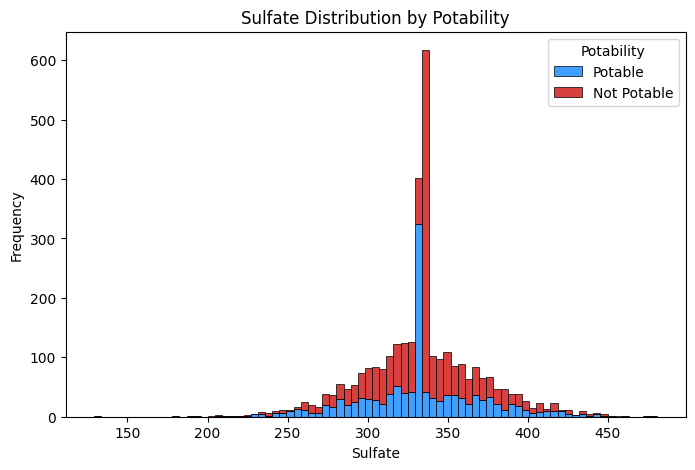

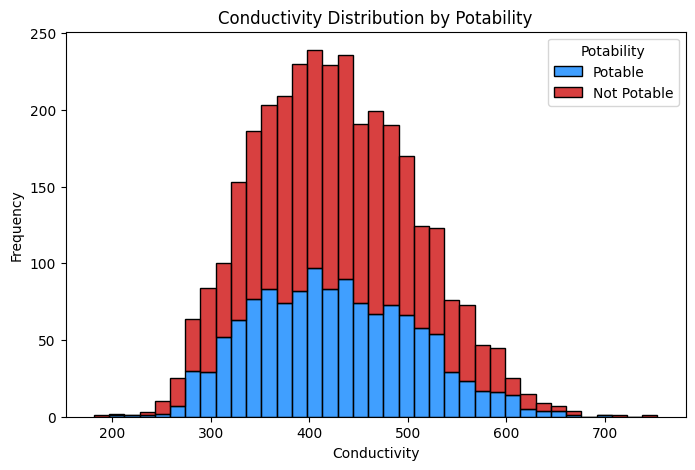

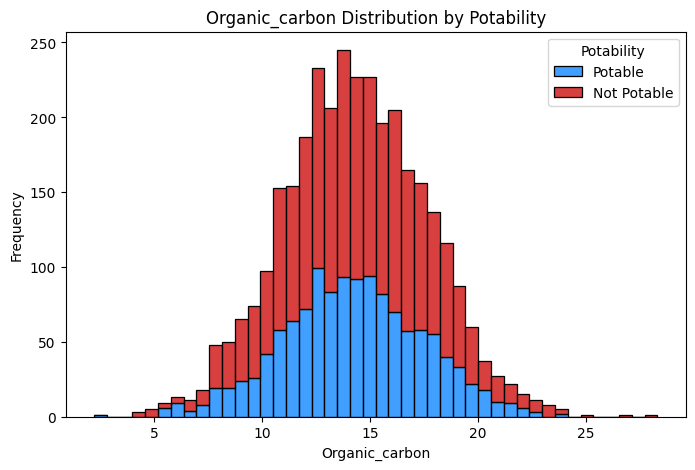

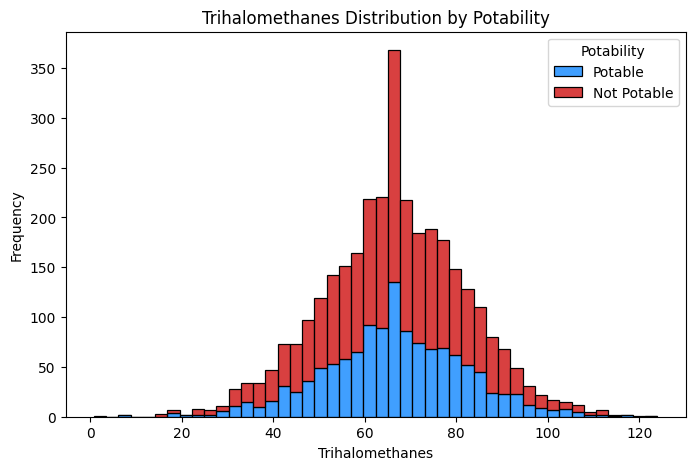

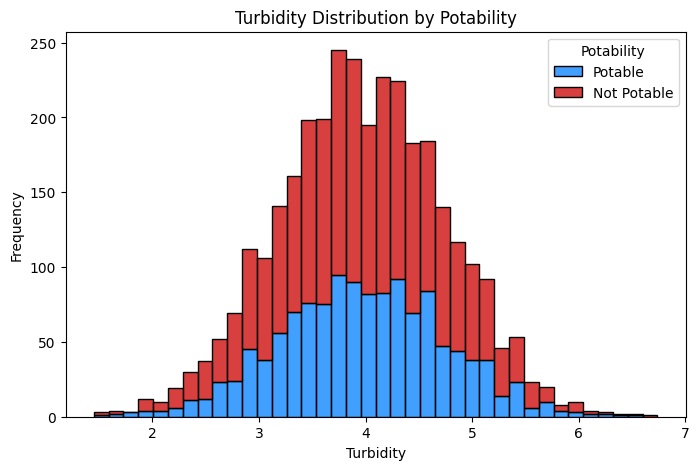

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with dark blue and red for fill colors
custom_palette = {0: "#cc0000", 1: "#007FFF"}  # Assuming 0 represents "Not Potable" and 1 represents "Potable"

# Select only the numeric columns for plotting
numeric_columns = df.columns.drop("Potability")

# Plot normal distribution for each numeric attribute
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue="Potability", multiple='stack', palette=custom_palette)
    plt.title(f"{col} Distribution by Potability")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(title="Potability", labels=["Potable", "Not Potable"])
    plt.show()


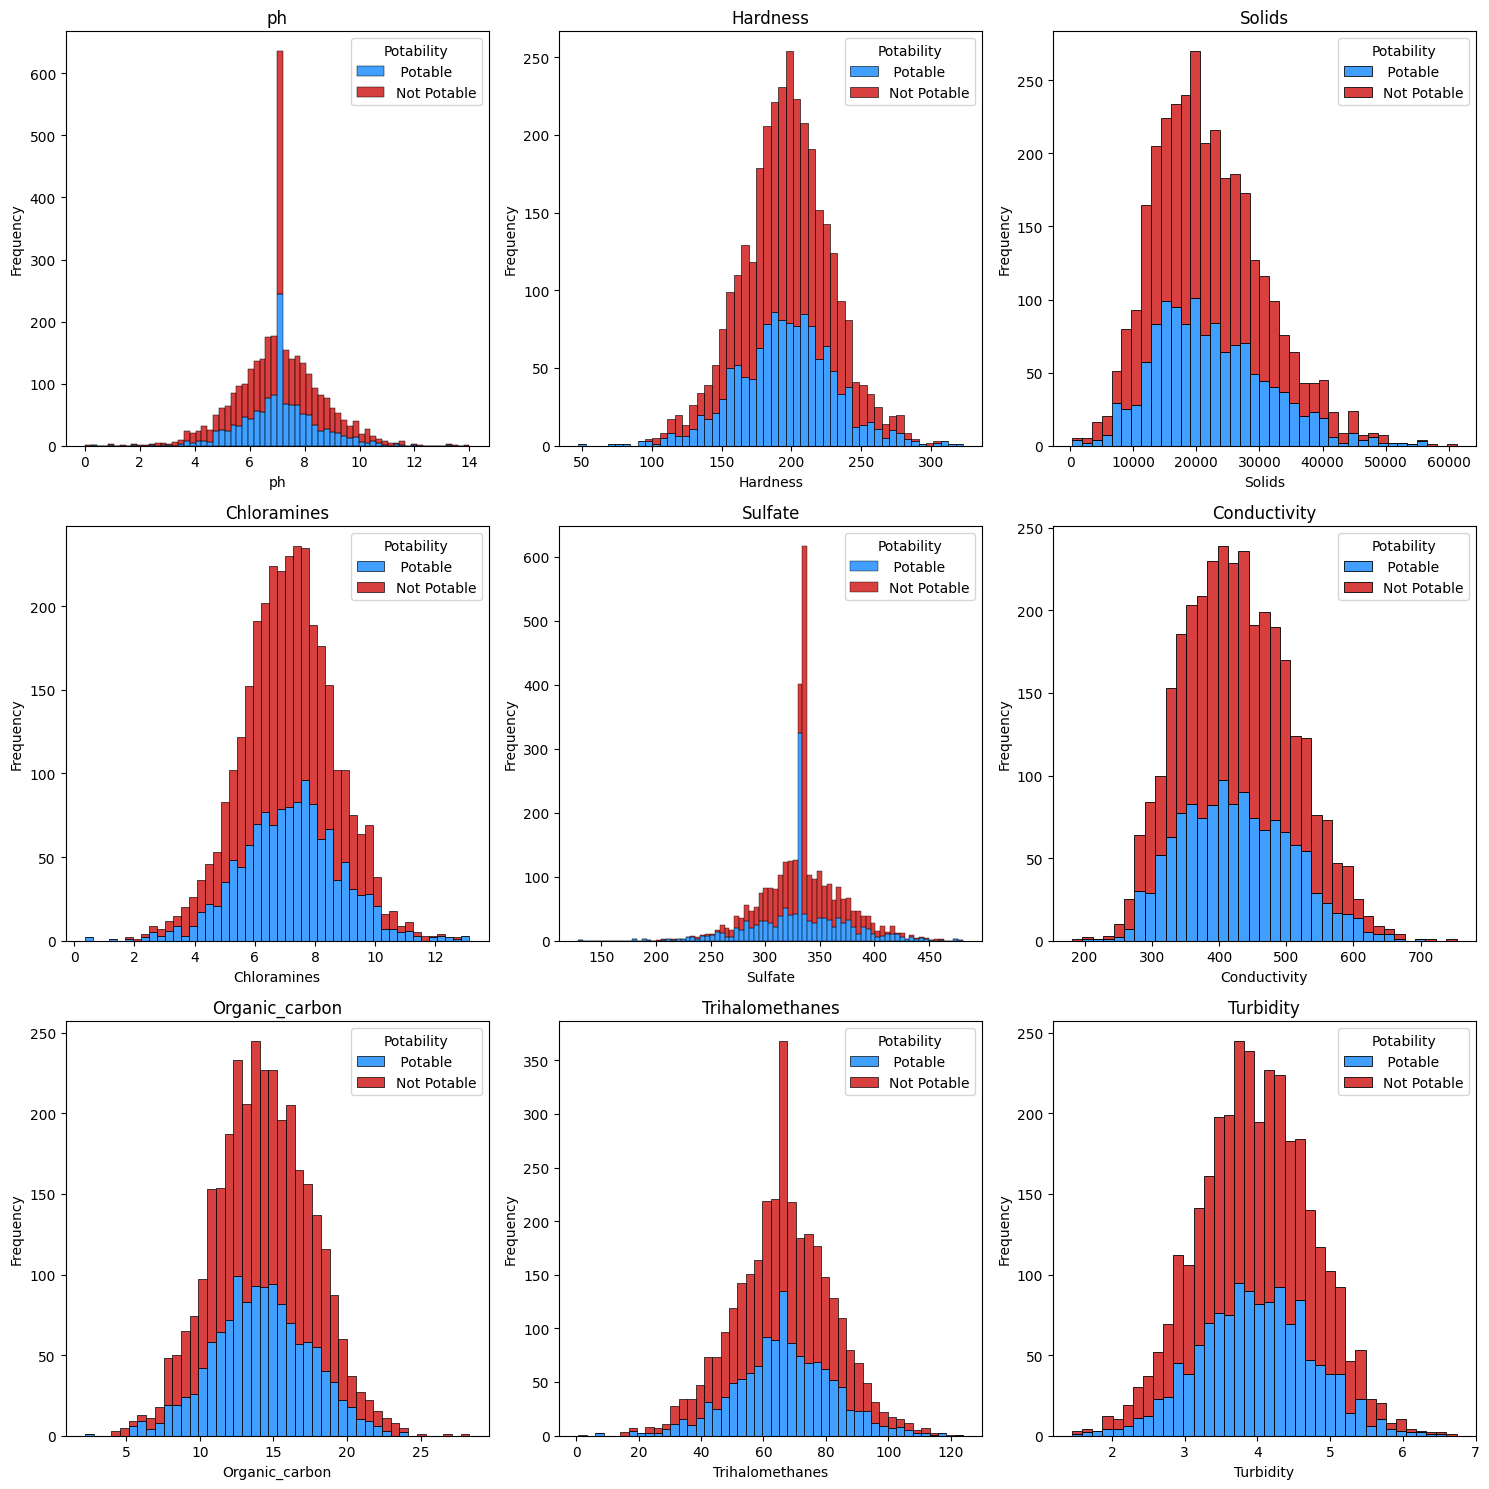

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15, 15))

# Define a custom color palette
custom_palette = ["#cc0000", "#007FFF"]

for row, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, row + 1)
    plt.title(col)

    # Combine and stack the KDE plots using fill=True and custom colors
    sns.histplot(data=df, x=col, hue="Potability", multiple='stack', palette=custom_palette)
    plt.ylabel("Frequency")
    plt.legend(title="Potability", labels=[" Potable", "Not Potable"])

plt.tight_layout()
plt.show()


##### Density Distribution Chart

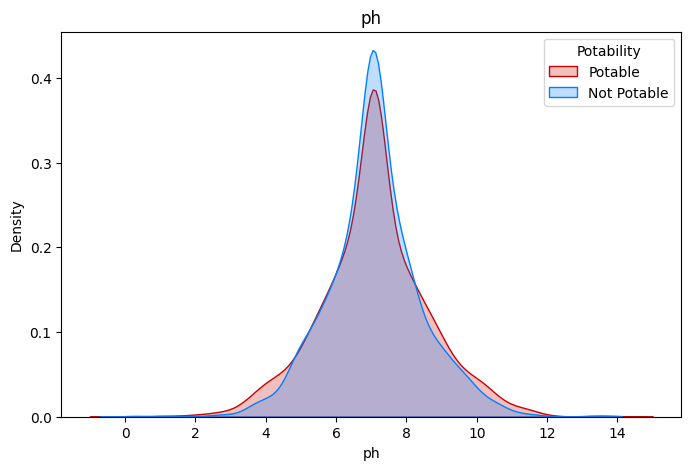

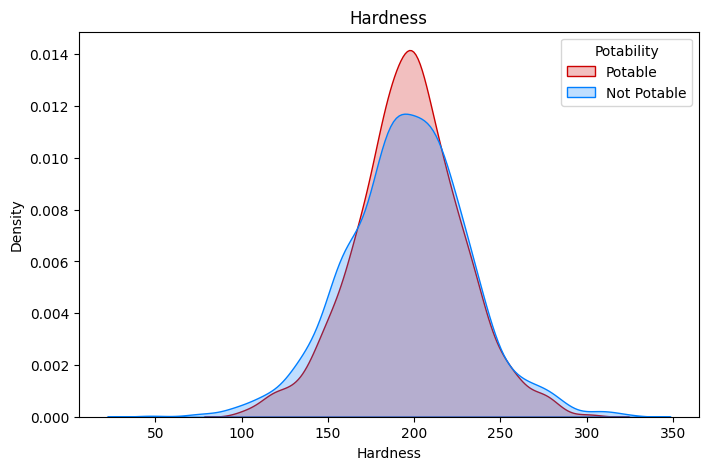

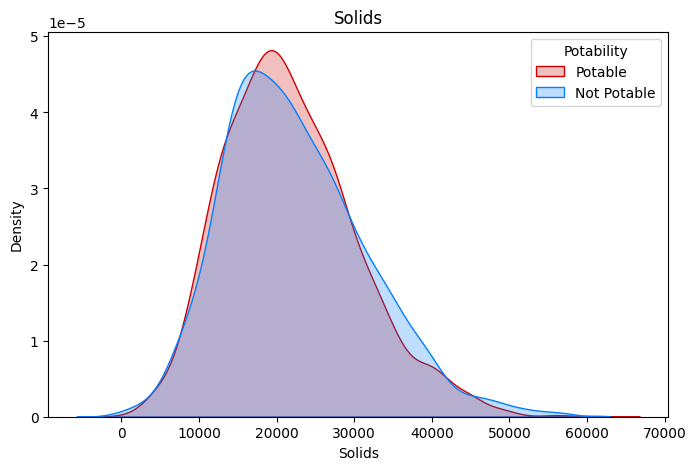

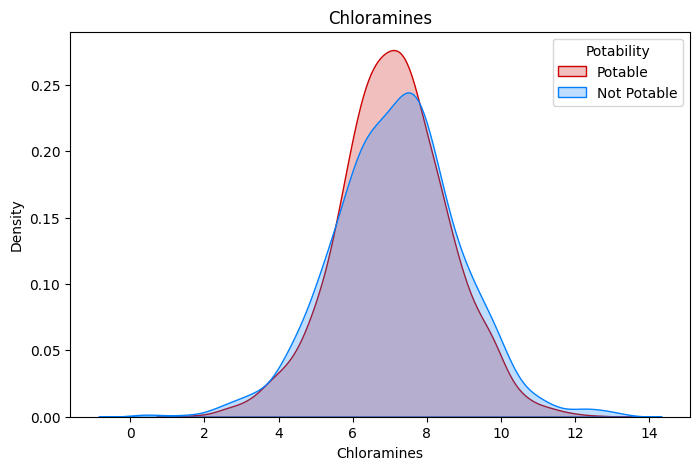

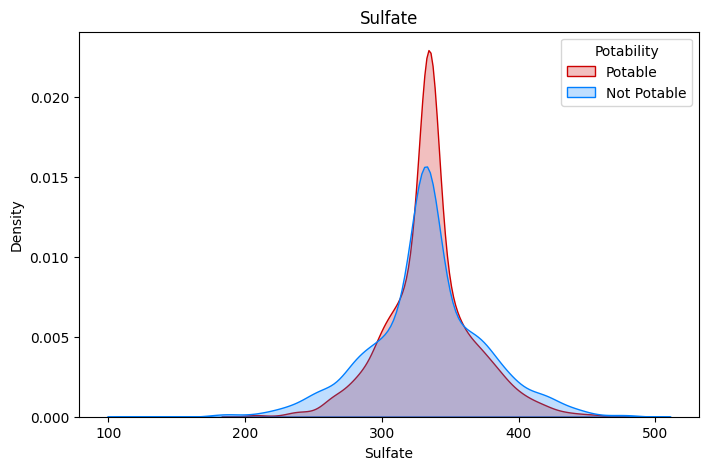

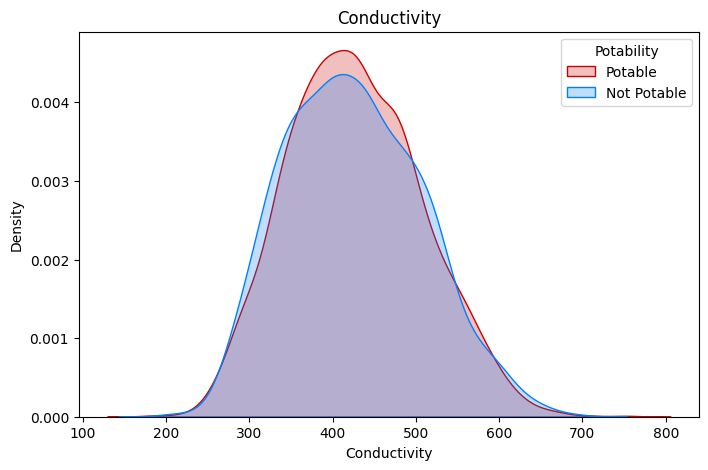

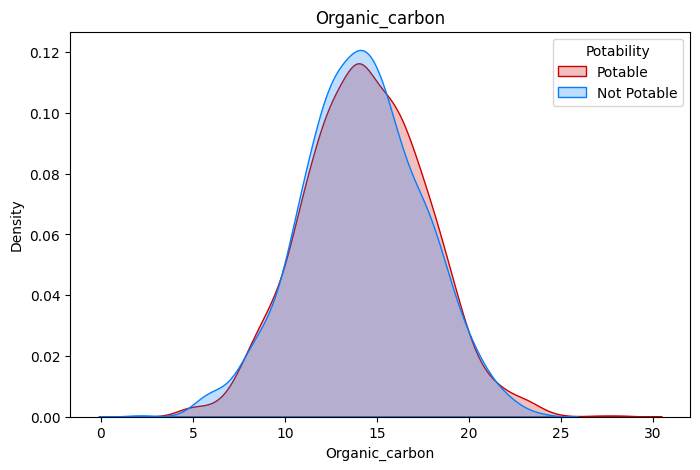

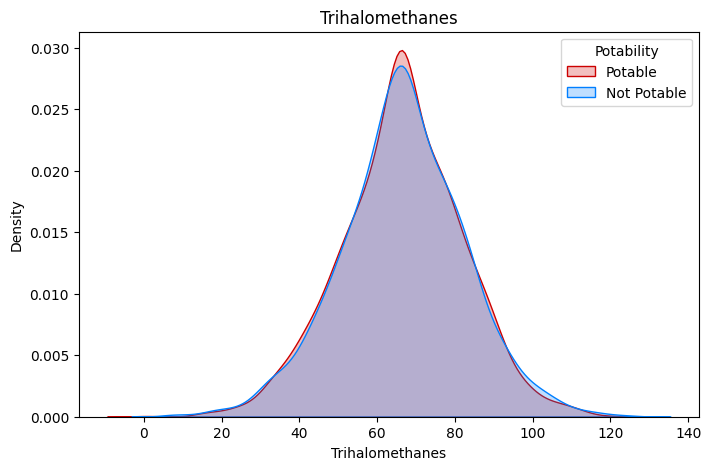

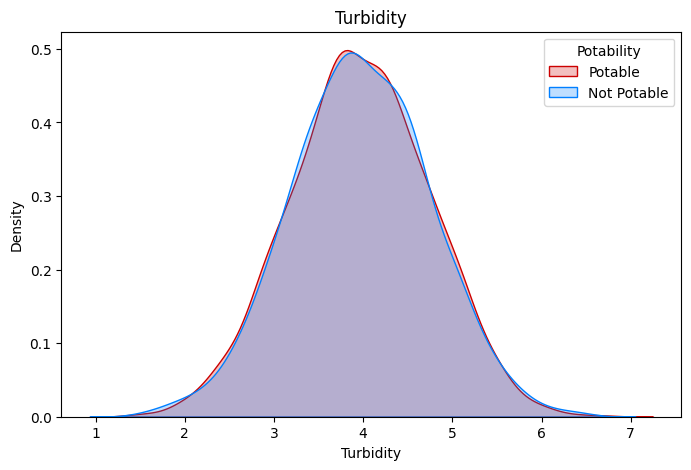

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

# Define a custom color palette with dark blue and red for fill colors
custom_palette = {0: "#cc0000", 1: "#007FFF"}  # Assuming 0 represents "Not Potable" and 1 represents "Potable"

# Select only the numeric columns for plotting
numeric_columns = df.columns.drop("Potability")

# Plot normal distribution for each numeric attribute
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
      # Combine and stack the KDE plots using fill=True and custom colors
    sns.kdeplot(x=non_potable[col], color=custom_palette[0], label="Non Potable", fill=True)
    sns.kdeplot(x=potable[col], color=custom_palette[1], label="Potable", fill=True)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Potability", labels=["Potable", "Not Potable"])
    plt.show()

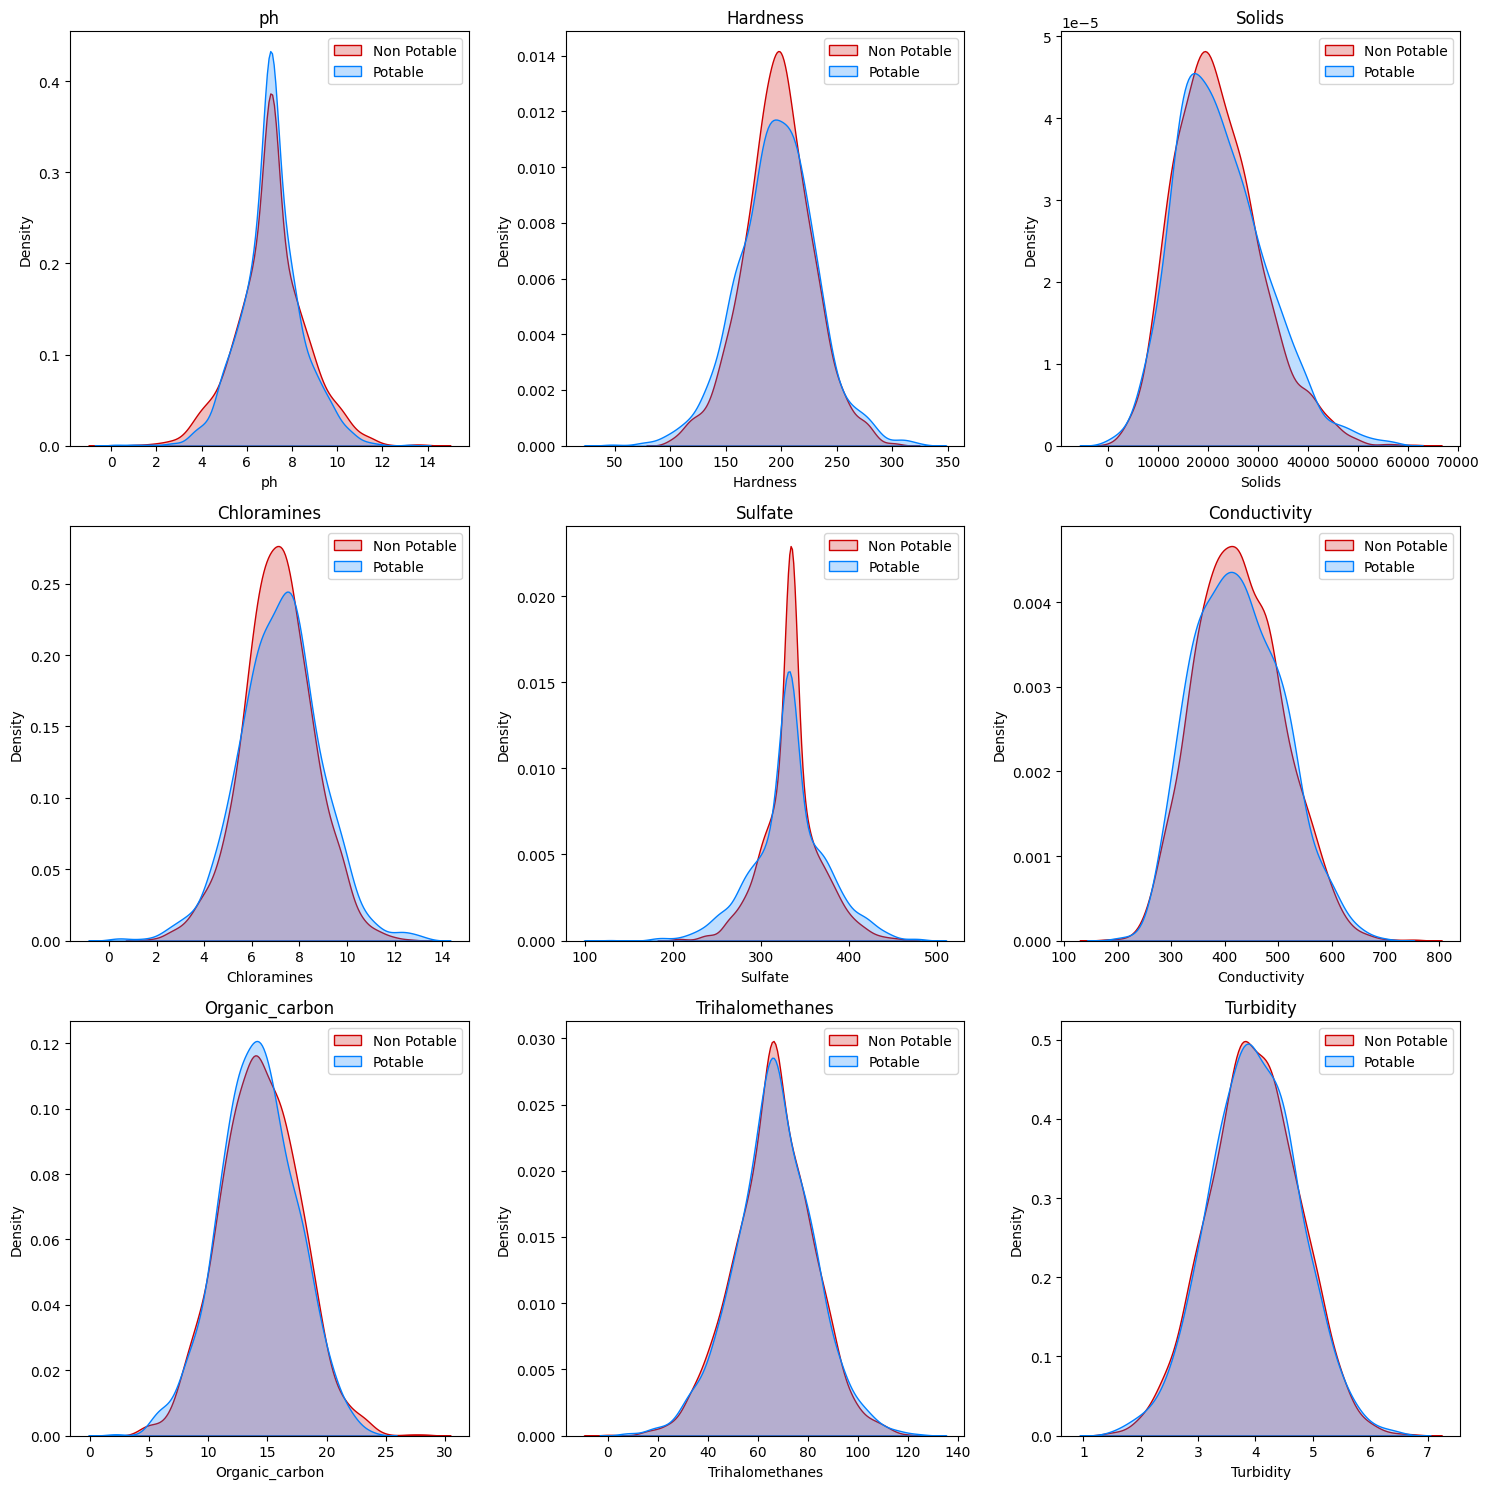

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15, 15))

# Define a custom color palette
custom_palette = ["#cc0000", "#007FFF"]

for row, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, row + 1)
    plt.title(col)

    # Combine and stack the KDE plots using fill=True and custom colors
    sns.kdeplot(x=non_potable[col], color=custom_palette[0], label="Non Potable", fill=True)
    sns.kdeplot(x=potable[col], color=custom_palette[1], label="Potable", fill=True)

    plt.legend()

plt.tight_layout()
plt.show()


### VIOLIN PLOTS
A violin plot is a type of data visualization that combines elements of a box plot (box-and-whisker plot) and a kernel density plot. It is used to visualize the distribution of numerical data and provides insights into the data's probability density. It  shows the distribution of data within that category.The width of the violin at any given point along the vertical axis indicates the data density at that point. Wider sections indicate higher data density, while narrower sections indicate lower density.

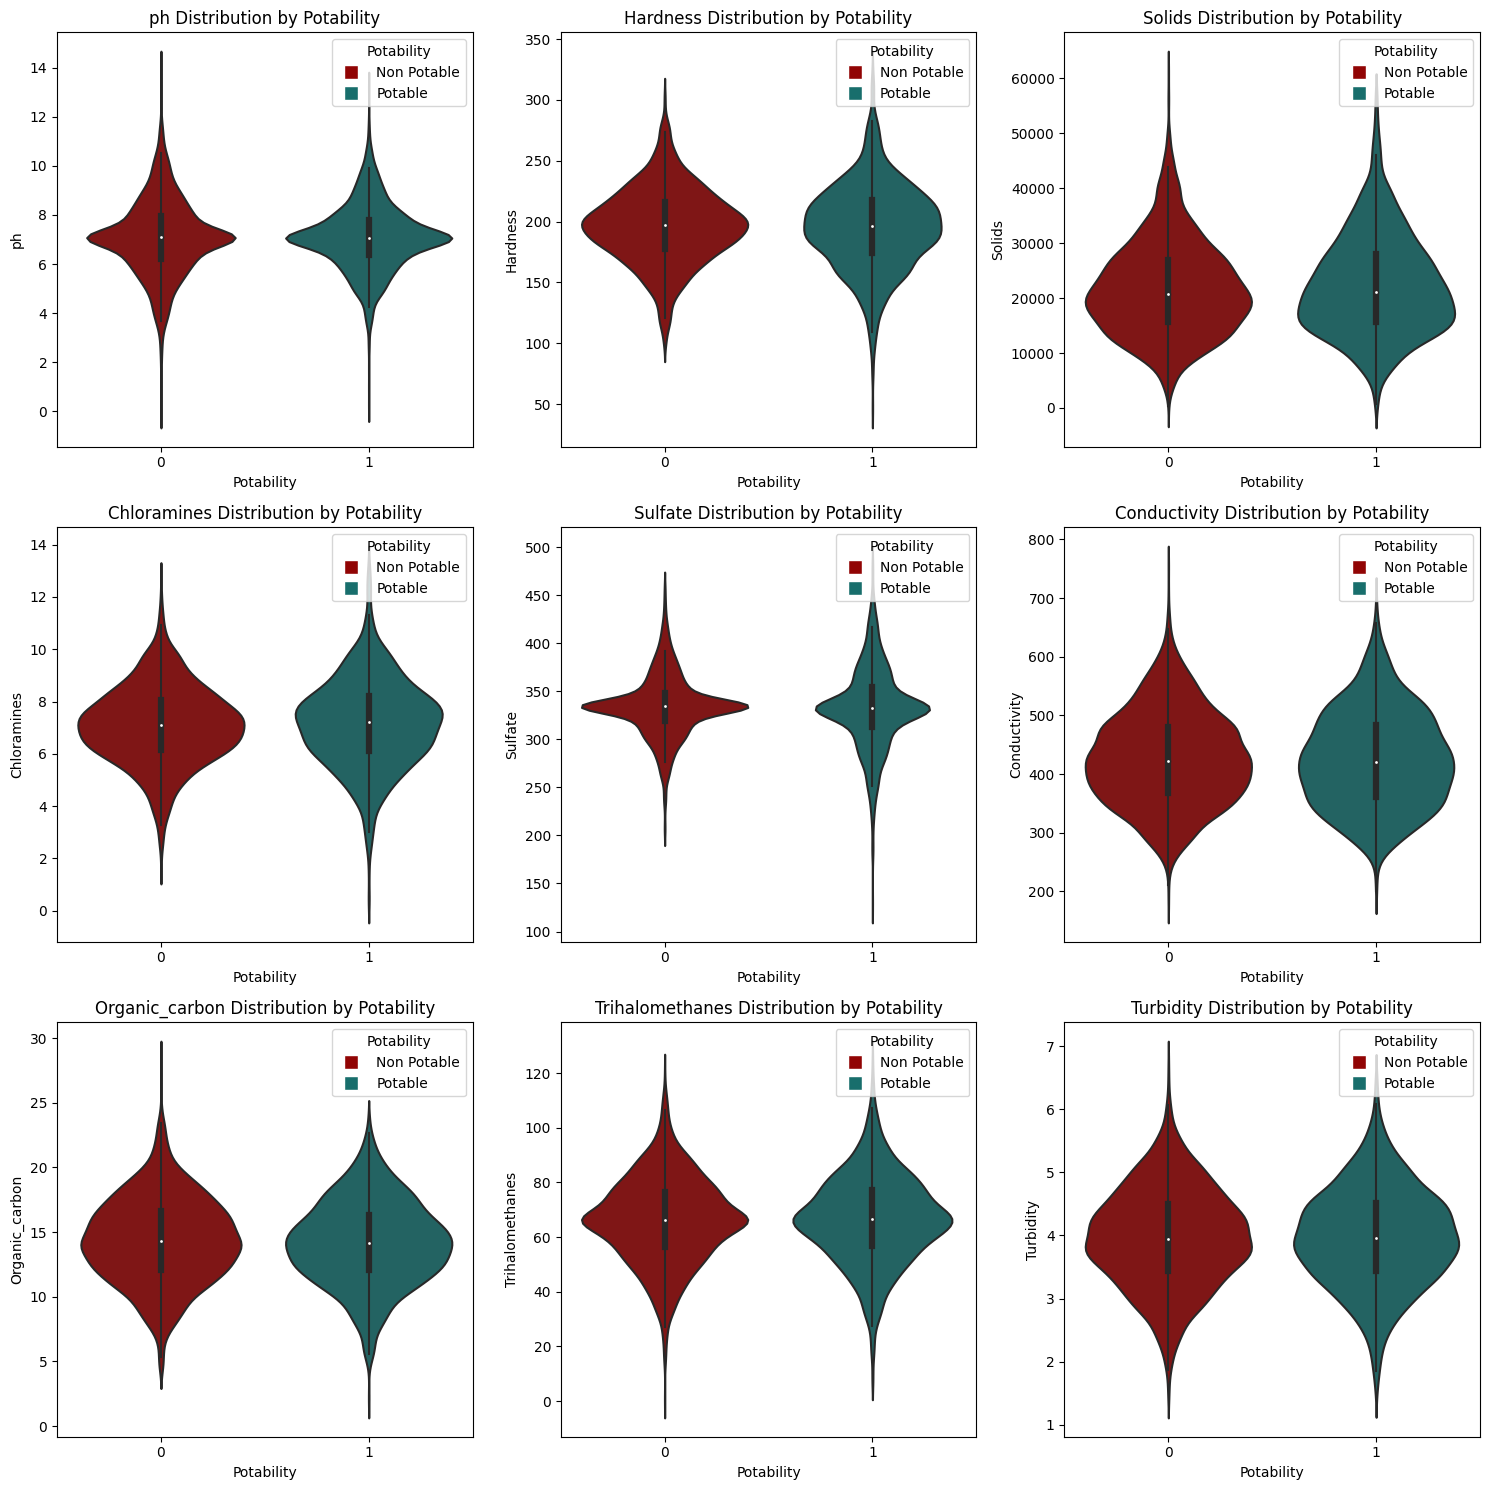

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15, 15))

# Define a custom color palette
custom_palette = ["#910404", "#186e6c"]

for row, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, row + 1)
    plt.title(col)

    # Use the custom color palette for the plot
    ax = sns.violinplot(x="Potability", y=col, data=df, palette=custom_palette)
    # Add a legend with square markers
    handles = [plt.Line2D([0], [0], marker='s', color='w', label='Non Potable', markersize=10, markerfacecolor=custom_palette[0]),
               plt.Line2D([0], [0], marker='s', color='w', label='Potable', markersize=10, markerfacecolor=custom_palette[1])]

    plt.legend(handles=handles, title="Potability")
    plt.title(f"{col} Distribution by Potability")
    plt.xlabel("Potability")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

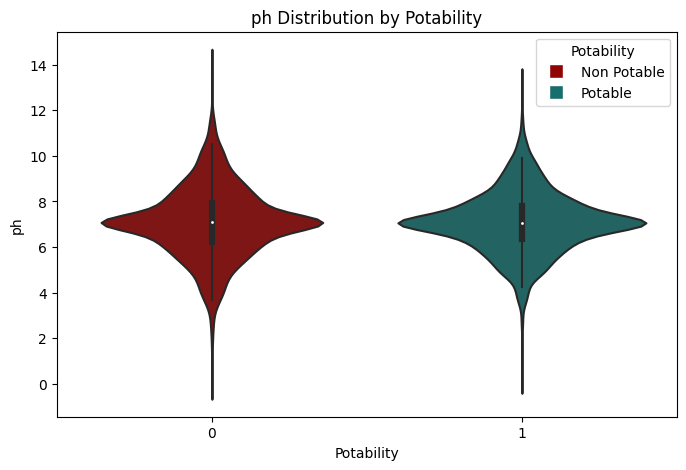

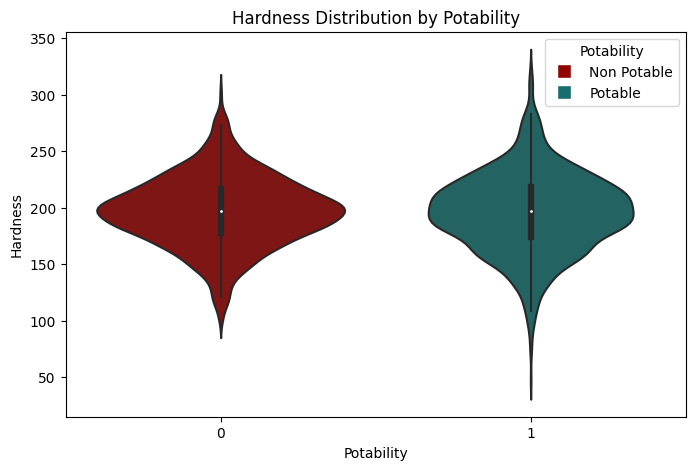

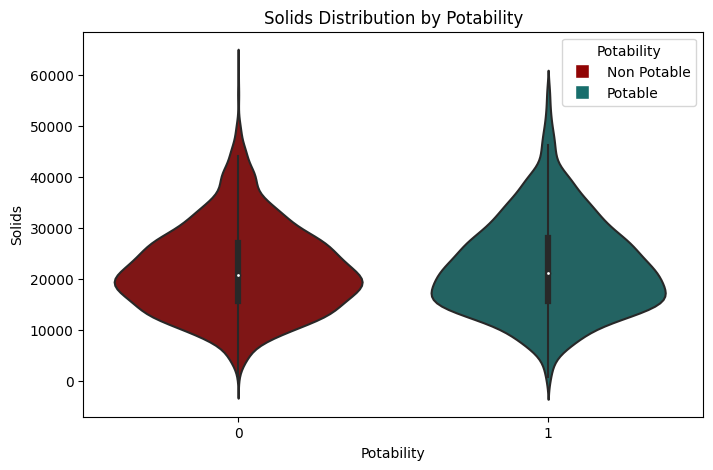

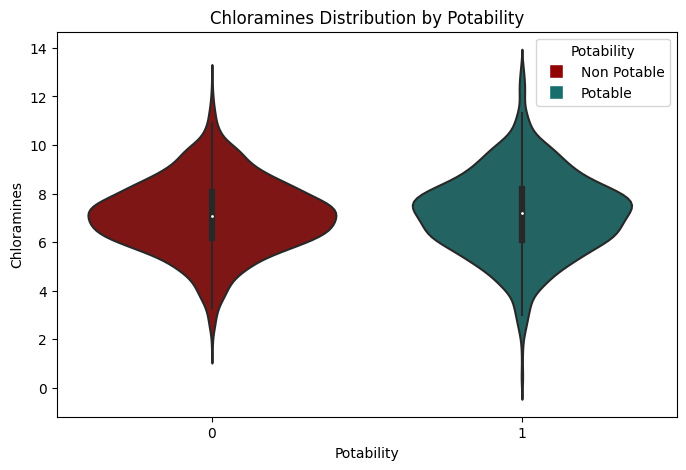

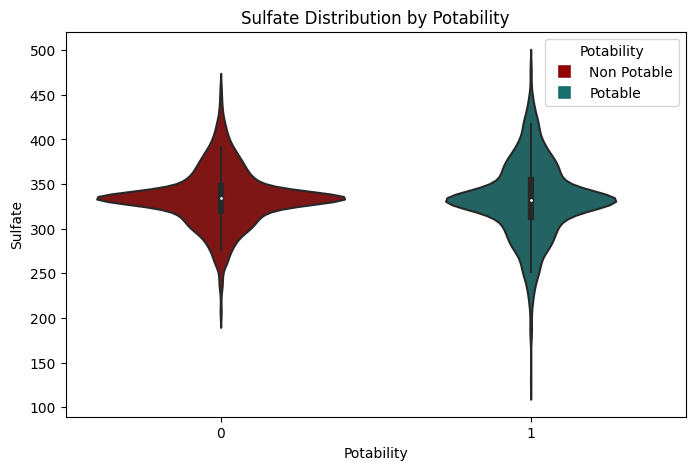

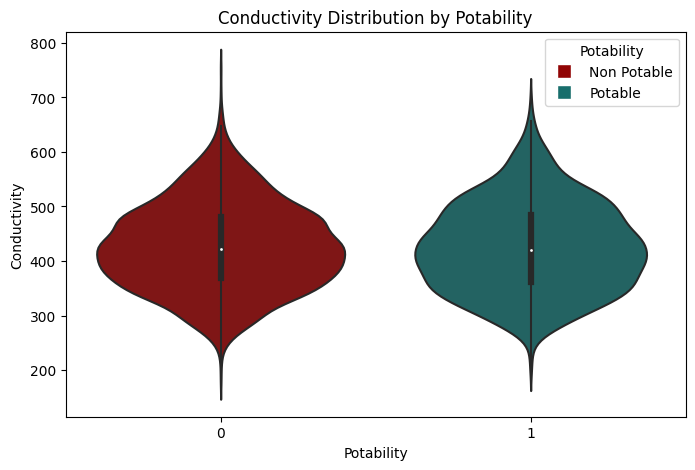

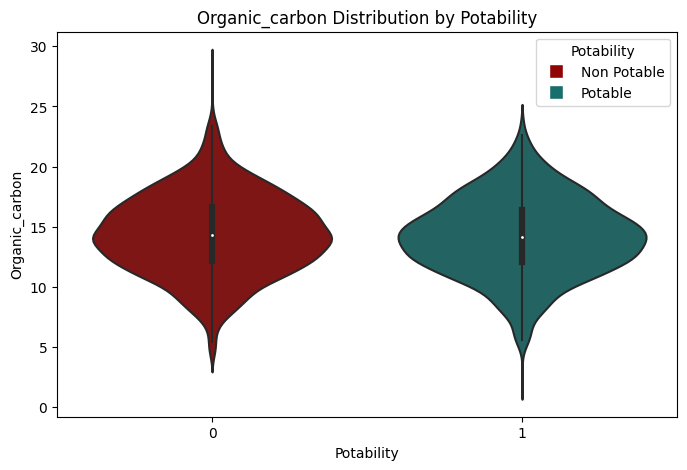

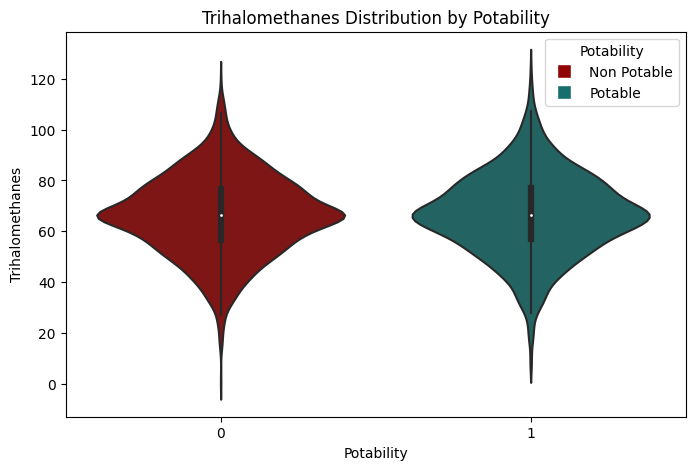

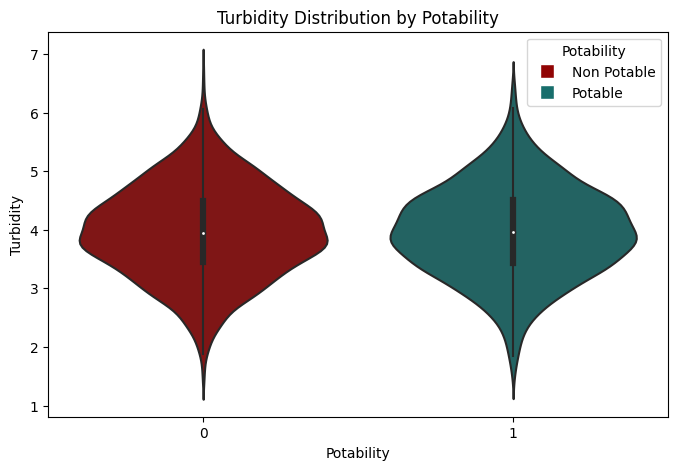

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
custom_palette = ["#910404", "#186e6c"]  # Replace with your desired colors

# Create side-by-side violin plots for each numeric attribute
for col in numeric_columns:
    plt.figure(figsize=(8, 5))

    # Use the custom color palette for the plot
    ax = sns.violinplot(x="Potability", y=col, data=df, palette=custom_palette)

    # Add a legend with square markers
    handles = [plt.Line2D([0], [0], marker='s', color='w', label='Non Potable', markersize=10, markerfacecolor=custom_palette[0]),
               plt.Line2D([0], [0], marker='s', color='w', label='Potable', markersize=10, markerfacecolor=custom_palette[1])]

    plt.legend(handles=handles, title="Potability")

    plt.title(f"{col} Distribution by Potability")
    plt.xlabel("Potability")
    plt.ylabel(col)
    plt.show()


### CORRELATION HEATMAP

A correlation matrix is a table or matrix that summarizes the correlation coefficients between many variables. In statistics and data analysis, correlation measures the degree to which two variables are related or move together in a linear fashion. A correlation matrix is often used to quickly identify trends and relationships in large datasets.

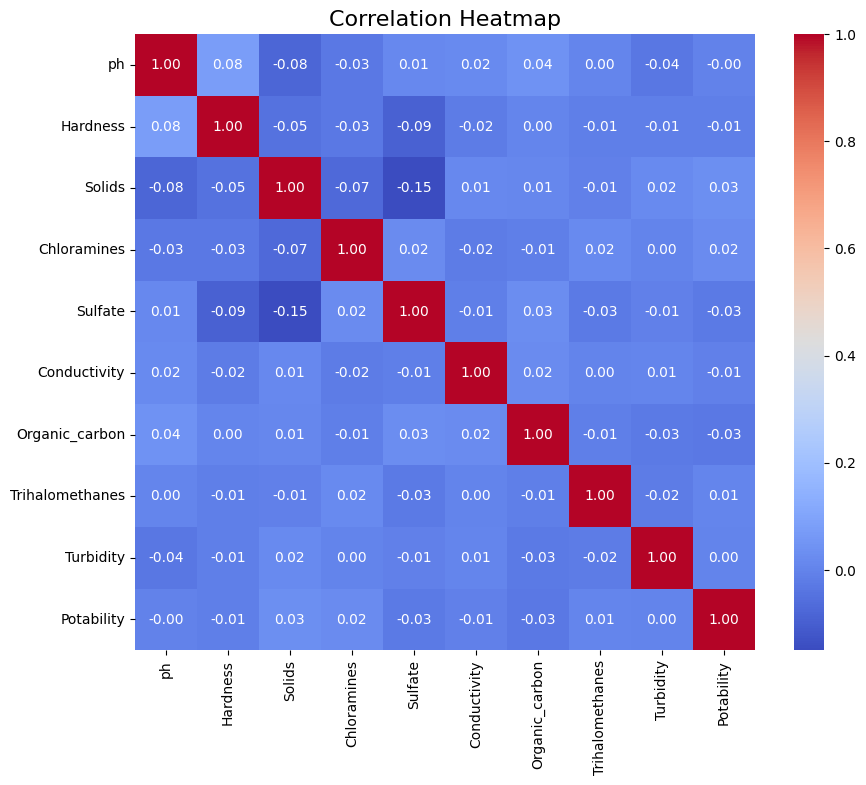

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap with rainbow colors
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('coolwarm')
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=cmap)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


## DATA SPLITTING

Since there is a target variable in dataset, classification is made by following the supervised learning method. First,the target variable and the other variables are separated from each other (Potability and other).

In [ ]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to your feature data and transform it
X_scaled = scaler.fit_transform(X)

In [ ]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go


# Assuming you have a DataFrame 'df' with a 'Potability' column
data = {'Potability': df['Potability'].tolist()}

# Calculate class percentages
class_counts = df['Potability'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

# Create a bar graph using Plotly Express
fig = px.bar(
    x=class_percentages.index,
    y=class_percentages.values,
    text=class_percentages.values,
    labels={'x': 'Class', 'y': 'Percentage (%)'},
    title="Before",
)

# Customize the layout
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Set different colors for 0 and 1
colors = ['red', 'blue']

# Set the size of the chart
fig.update_layout(
    width=450,  # Set the width to your desired value
    height=500,  # Set the height to your desired value
)
# Customize the layout
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_traces(marker=dict(color=['red', 'blue']))  # Set different colors for 0 and 1

# Add a custom legend using go.Bar traces
for i in range(2):
    fig.add_trace(go.Bar(x=['0' if i == 0 else '1'], y=[0], marker_color=colors[i], name=f'{i} - {"Non Potable" if i == 0 else "Potable"}'))

# Show the legend
fig.update_layout(showlegend=True)

fig.show()


From the graph , it is understandable that 61% of the attribute 'Potability' which is the target variable belongs to class-'0' and 39% belongs to class - '1'.This describes the imbalance in the dataset.Without addressing the imbalance in a dataset, the model may become biased toward the majority class. To address class imbalance, resampling techniques can beconsider. ou train a machine learning model on an imbalanced dataset without addressing the imbalance, the model may become biased toward the majority class.

###HANDLING CLASS IMBALANCE

##### RESAMPLING METHOD

Resampling is a technique used in machine learning and statistics to manipulate the distribution of data in a dataset by either adding more samples to certain classes (oversampling) or reducing the number of samples in certain classes (undersampling). In this dataset class -(0) is high in distribution ,so it can be subject to undersampling and class -'1' which is very less in distribution can be subject to oversampling.

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Split the data into training, validation, and test sets
#X_train,y_train= train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply SMOTE to balance the training data
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled_ros, y_train_resampled_ros = ros.fit_resample(X_train, y_train)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Undersampling to balance the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled_rus, y_train_resampled_rus = rus.fit_resample(X_train, y_train)



Distribution after resampling.

In [ ]:

# Calculate class percentages for resampled data
class_counts_resampled_ros = y_train_resampled_ros.value_counts()
class_percentages_resampled_ros = (class_counts_resampled_ros / class_counts_resampled_ros.sum()) * 100

# Create a bar graph using Plotly Express for resampled data
fig_resampled_ros = px.bar(
    x=class_percentages_resampled_ros.index,
    y=class_percentages_resampled_ros.values,
    text=class_percentages_resampled_ros.values,
    labels={'x': 'Class', 'y': 'Percentage (%)'},
    title="After",
)

# Customize the layout for resampled data
fig_resampled_ros.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_resampled_ros.update_traces(marker=dict(color=['red', 'blue']))  # Set different colors for 0 and 1

# Add a custom legend using go.Bar traces for resampled data
for i in range(2):
    fig_resampled_ros.add_trace(
        go.Bar(
            x=['0' if i == 0 else '1'],
            y=[0],
            marker_color=colors[i],
            name=f'{i} - {"Non Potable" if i == 0 else "Potable"}',
        )
    )
# Set the size of the chart for resampled data (smaller)
fig_resampled_ros.update_layout(
    width=450,  # Set the width to your desired value
    height=500,  # Set the height to your desired value
)
# Show the legend for resampled data
fig_resampled_ros.update_layout(showlegend=True)

fig_resampled_ros.show()


After resampling both classes in target attribute 'Potability' became equal, that is 50-50 distribution.Thus the classes  are now balanced and can perform further modelling.

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to balance the training data
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled_ros, y_train_resampled_ros = ros.fit_resample(X_train, y_train)

# Apply Random Undersampling to balance the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled_rus, y_train_resampled_rus = rus.fit_resample(X_train, y_train)



In order to measure the accuracy rate in the modeling, the dataset was divided into test,train and valid in the ratio 80-20.Here 80% of the records are  used to train the model and remaining will be used to validation and testing and that will be in an equal ratio.

### MODELING

### SVM

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_resampled_ros, y_train_resampled_ros)

# Predict on the validation set using SVM
y_valid_pred_svm = svm_classifier.predict(X_valid)

# Evaluate the SVM model on the validation set
accuracy_valid_svm = accuracy_score(y_valid, y_valid_pred_svm)
print(f"SVM Validation Set Accuracy: {accuracy_valid_svm*100:.2f}%")




SVM Validation Set Accuracy: 53.35%


### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(
    random_state=42  # Set a random seed for reproducibility
)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train_resampled_ros, y_train_resampled_ros)

# Predict on the validation set using Random Forest
y_valid_pred_rf = rf_classifier.predict(X_valid)

# Evaluate the Random Forest model on the validation set
accuracy_valid_rf = accuracy_score(y_valid, y_valid_pred_rf)
print(f"Random Forest Validation Set Accuracy: {accuracy_valid_rf*100:.2f}%")



Random Forest Validation Set Accuracy: 75.61%


### XGBoost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# data = pd.read_csv('your_dataset.csv')

# Separate the target variable (e.g., 'Potability') from the features
# X = data.drop('Potability', axis=1)
# y = data['Potability']

# Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',        # Evaluation metric
    random_state=42               # Set a random seed for reproducibility
)

# Train the classifier on the training data
xgb_classifier.fit(X_train_resampled_ros, y_train_resampled_ros)

# Predict on the validation set
y_valid_pred = xgb_classifier.predict(X_valid)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Set Accuracy: {accuracy_valid*100:.2f}%")



Validation Set Accuracy: 76.22%


###MODEL VALIDATION ACCURACY COMPARISON

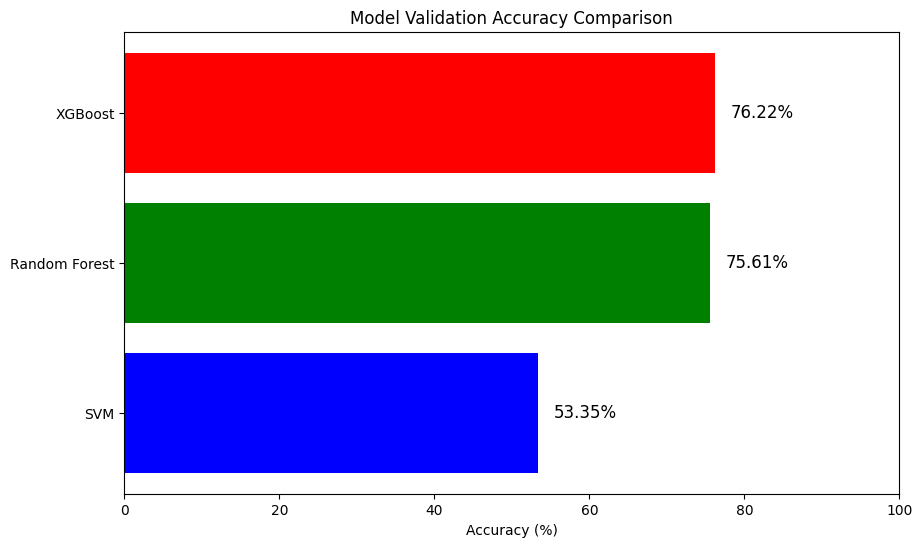

In [ ]:

# Create a horizontal bar chart to compare accuracies
models = ['SVM','Random Forest','XGBoost']
accuracies = [accuracy_valid_svm*100,accuracy_valid_rf*100,accuracy_valid*100]


plt.figure(figsize=(10, 6))  # Increase the figure size
bars = plt.barh(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Accuracy (%)')  # Update the label
plt.title('Model Validation Accuracy Comparison')
plt.xlim(0.0, 100.0)  # Update the x-axis limits

for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', fontsize=12)

plt.show()

### HYPER PARAMETER TUNING

In [ ]:
####
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# data = pd.read_csv('your_dataset.csv')

# Separate the target variable (e.g., 'Potability') from the features
# X = data.drop('Potability', axis=1)
# y = data['Potability']

# Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',        # Evaluation metric
    random_state=42               # Set a random seed for reproducibility
)

# Define a hyperparameter grid for GridSearchCV for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV with the XGBoost classifier and hyperparameter grid
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the training data
xgb_grid_search.fit(X_train_resampled_ros, y_train_resampled_ros)

# Get the best hyperparameters for XGBoost
best_xgb_params = xgb_grid_search.best_params_
print("Best XGBoost Hyperparameters:", best_xgb_params)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a hyperparameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV with the Random Forest classifier and hyperparameter grid
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the training data
rf_grid_search.fit(X_train_resampled_ros, y_train_resampled_ros)

# Get the best hyperparameters for Random Forest
best_rf_params = rf_grid_search.best_params_
print("Best Random Forest Hyperparameters:", best_rf_params)




# Train the final XGBoost model on the training data using the best hyperparameters
final_xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    **best_xgb_params
)
final_xgb_classifier.fit(X_train_resampled_ros, y_train_resampled_ros)

# Train the final Random Forest model on the training data using the best hyperparameters
final_rf_classifier = RandomForestClassifier(random_state=42, **best_rf_params)
final_rf_classifier.fit(X_train_resampled_ros, y_train_resampled_ros)



# Predict on the test set using XGBoost
y_test_pred_xgb = final_xgb_classifier.predict(X_test)

# Predict on the test set using Random Forest
y_test_pred_rf = final_rf_classifier.predict(X_test)


Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Random Forest Hyperparameters: {'max_depth': 5, 'n_estimators': 200}


In [ ]:
# Calculate accuracy on the test set using XGBoost
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Test Set Accuracy of XGBoost: {accuracy_test_xgb*100:.2f}%")

# Calculate accuracy on the test set using Random Forest
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Set Accuracy of Random Forest: {accuracy_test_rf*100:.2f}%")

Test Set Accuracy of XGBoost: 81.40%
Test Set Accuracy of Random Forest: 78.66%


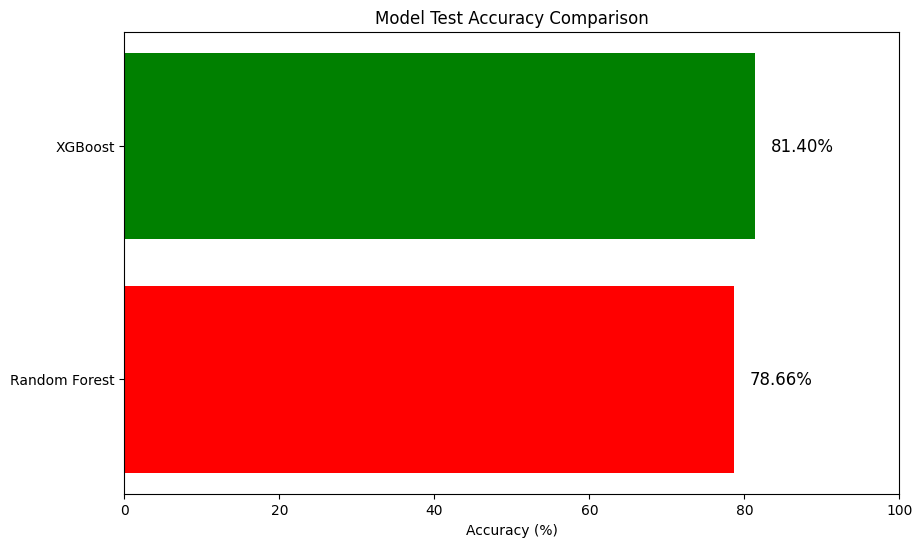

In [ ]:
# Create a horizontal bar chart to compare accuracies
models = ['Random Forest',  'XGBoost']
accuracies = [accuracy_test_rf * 100,  accuracy_test_xgb * 100]  # Multiply by 100 to convert to percentage

plt.figure(figsize=(10, 6))  # Increase the figure size
bars = plt.barh(models, accuracies, color=['red', 'green'])
plt.xlabel('Accuracy (%)')  # Update the label
plt.title('Model Test Accuracy Comparison')
plt.xlim(0.0, 100.0)  # Update the x-axis limits

for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', fontsize=12)

plt.show()


##### COMPARATIVE ANALYSIS ON DIFFERENT ALGORITHM

Here XGBoost has higher accuracy which is 81%.So this model can be used predicting potability of water using this dataset.

## PREDICTING USING XGB MODEL

In [ ]:
# Define your new data
new_data = [[7, 196, 1000, 3, 40, 300, 3, 70, 5]]

# Use the trained XGBoost model for prediction
xgboost_model = final_xgb_classifier  # Assuming `final_xgb_classifier` is your trained model
xgboost_predictions = xgboost_model.predict(new_data)

# Print the XGBoost predictions
print("XGBoost Predictions:", xgboost_predictions)


XGBoost Predictions: [1]
